In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import statistics as stat

In [ ]:
experiment_length = 3000
n_landmark = 4

In [ ]:
def truncate(input: float, decimals: int = 2) -> float: 
  """
  Truncate float value from n-th decimal digit on.
  
  Args:
    input: float value
    decimals: number of decimal digits to be kept; 2 by default 
  
  Returns:
    THe truncated float value

  """
  return math.trunc(input * 10**decimals) / 10**decimals

def create_ts(checkpoints: list, total_length: int = experiment_length) -> list:
  '''Create the TS values from the given checkpoints.

  Args:
    checkpoints: int values representing the time a new landmark has been explored
    experiment_length: length of the expriment; not epxlored landmark at this that time 

  Returns:
    a list of length total_length where each element represent represent the numbe rof explored landmarks at a that time 
    (e.g., res[10] = 2 -> 2 explored landmarks at time 11)  

  '''
  l_0 = [0  for _ in range(checkpoints[0])]
  l_1 = [1  for _ in range(checkpoints[0], checkpoints[1])] 
  l_2 = [2  for _ in range(checkpoints[1], checkpoints[2])] 
  l_3 = [3  for _ in range(checkpoints[2], checkpoints[3])]
  l_4 = [4  for _ in range(checkpoints[3], total_length)]
  l_0.extend(l_1)
  l_0.extend(l_2)
  l_0.extend(l_3)
  l_0.extend(l_4)
  return l_0

def goodness(t_checkpoints: list, total_length: int = experiment_length, n_landmarks = n_landmark):
  '''Calcualte the goodness of a given ts
   
  Args:
    t_checkpoints: times of exploration for each landmark
    
  Return:
    A goodness value normalized in [0;1]
  '''
  return truncate(sum(create_ts(t_checkpoints)) / (total_length * n_landmark), 2)


# Side

cluster = 1  
obstacle = 0

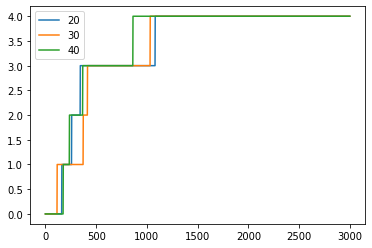

0.84
0.83
0.86


In [ ]:
t_1_20 = [161, 258, 343, 1081]
t_1_30 = [115, 372, 414, 1032]
t_1_40 = [175, 236, 367, 862]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_1_20))
print(goodness(t_1_30))
print(goodness(t_1_40))

cluster = 1  
obstacles = 10

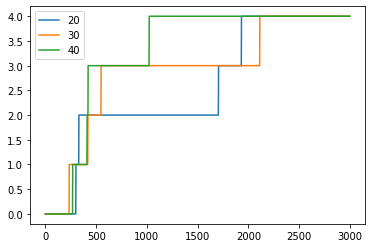

0.64
0.72
0.82


In [ ]:
t_1_20 = [300, 329, 1705, 1931]
t_1_30 = [234, 418, 548, 2112]
t_1_40 = [268, 410, 420, 1022]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_1_20))
print(goodness(t_1_30))
print(goodness(t_1_40))

cluster = 1  
obstacles = 20

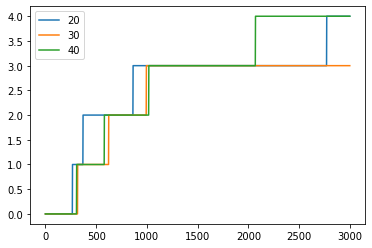

0.64
0.58
0.66


In [ ]:
t_1_20 = [266, 370, 863, 2771]
t_1_30 = [317, 623, 994, 3000]
t_1_40 = [307, 580, 1018, 2069]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_1_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_1_20))
print(goodness(t_1_30))
print(goodness(t_1_40))

cluster = 3  
obstacles = 0

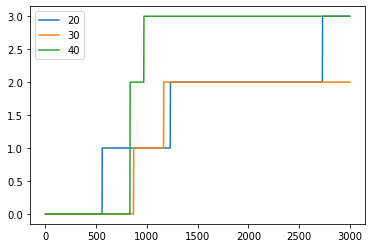

0.37
0.33
0.53


In [ ]:
t_3_20 = [559, 1231, 2730, 3000]
t_3_30 = [869, 1165, 3000, 3000]
t_3_40 = [833, 834, 970, 3000]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_3_20))
print(goodness(t_3_30))
print(goodness(t_3_40))

cluster = 3  
obstacles = 10

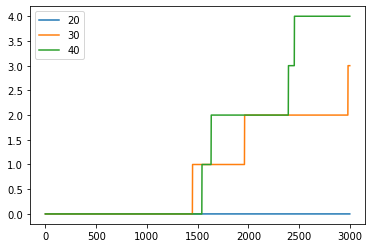

0.0
0.21
0.33


In [ ]:
t_3_20 = [3000, 3000, 3000, 3000]
t_3_30 = [1449, 1962, 2981, 3000]
t_3_40 = [1542, 1633, 2394, 2453]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_3_20))
print(goodness(t_3_30))
print(goodness(t_3_40))

cluster = 3  
obstacles = 20

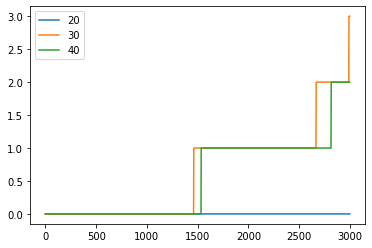

0.0
0.15
0.13


In [ ]:
t_3_20 = [3000, 3000, 3000, 3000]
t_3_30 = [1461, 2667, 2990, 3000]
t_3_40 = [1534, 2815, 3000, 3000]
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_20))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_30))
plt.plot([_ for _ in range(experiment_length)], create_ts(t_3_40))
plt.legend(['20', '30', '40'])
plt.show()

print(goodness(t_3_20))
print(goodness(t_3_30))
print(goodness(t_3_40))